In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Bernoulli

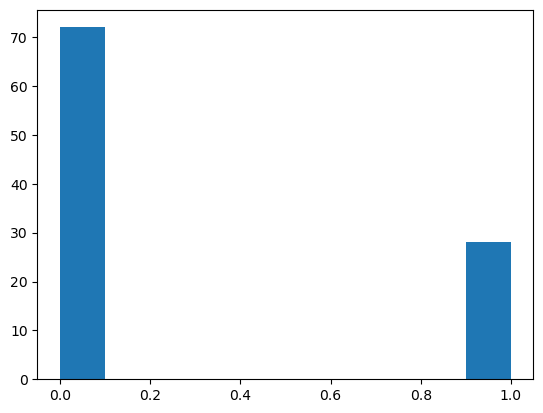

In [3]:
p = 0.25
n = 1
size = 100
X = np.random.binomial(n, p, size)

plt.hist(X);

In [27]:
p = 0.25
rv = stats.bernoulli(p)

print("PMF\t:\t", rv.pmf([0, 1]))
print("CDF\t:\t", rv.cdf([0, 1]))
print("E[X]\t:\t", rv.expect())
print("Var[X]\t:\t", rv.var())
print("", rv.rvs(size=10))
rv.rvs()

PMF	:	 [0.75 0.25]
CDF	:	 [0.75 1.  ]
E[X]	:	 0.25
Var[X]	:	 0.1875
 [0 0 0 0 0 0 0 1 0 1]


0

[[0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 1.]
 [1. 1. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]]


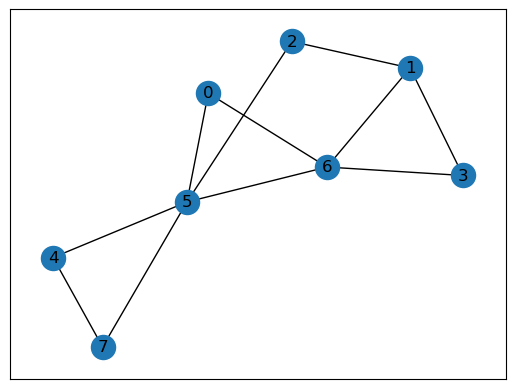

In [28]:
import networkx as nx

# Erdos-Renyi random graph

p = 0.5
rv = stats.bernoulli(p)

n = 8
adj_matrix = np.zeros([n, n])

# adj matrix symmetric
for i in range(n):
    for j in range(i):
        adj_matrix[i, j] = adj_matrix[j, i] = rv.rvs()

print(adj_matrix)

G = nx.from_numpy_matrix(adj_matrix)
nx.draw_networkx(G)

In [6]:
# Monte-Carlo matrix multiplication
m = 2048
n = 4096

A = np.random.rand(m, n)
B = np.random.rand(n, m)

%timeit np.dot(A, B)

125 ms ± 3.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
# uniform sampling
def mc_uniform(A, B, beta=4):
    p = beta * (1 / n)
    idx = np.random.binomial(1, p, n).astype(bool)
    return np.dot(A[:, idx], B[idx]) / p

%timeit mc_uniform(A,B, beta=128)

34.1 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
np.linalg.norm(np.dot(A, B) - mc_uniform(A, B, beta=32)) / (m * n)

0.04029461881921786

In [9]:
def rank_one_sampling(A, B):
    p = np.zeros(n)
    for i in range(n):
        p[i] = np.linalg.norm(A[:, i]) * np.linalg.norm(B[i])

    # normalize
    p = p / np.linalg.norm(p, ord=1)
    return p


%timeit rank_one_sampling(A, B)

427 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Binomial

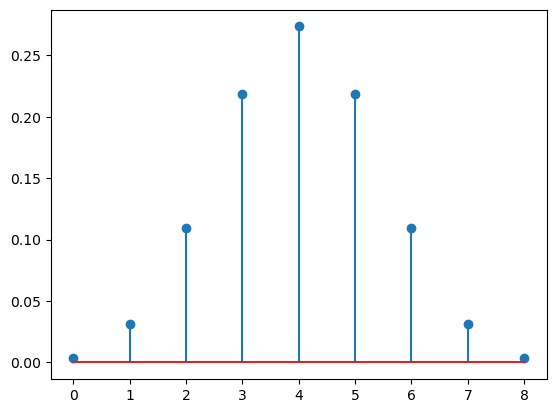

In [10]:
p = 0.5
n = 8
rv = stats.binom(n, p)
pmf = rv.pmf(np.arange(n + 1))
plt.stem(pmf);

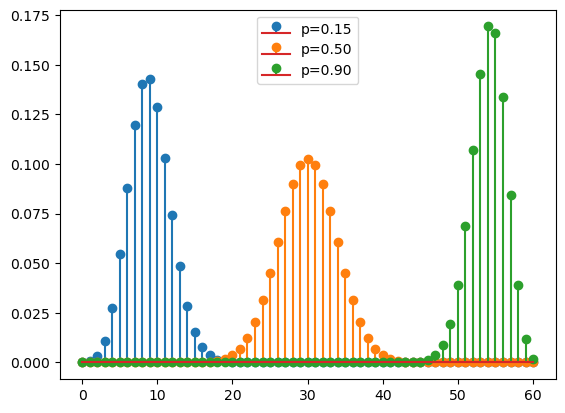

In [11]:
n = 60
p_values = [0.15, 0.5, 0.9]

for i, p in enumerate(p_values):
    rv = stats.binom(n, p)
    x = np.arange(n + 1)
    plt.stem(rv.pmf(x), label=f'p={p:.2f}', linefmt=f'C{i}-')

plt.legend()
plt.show()

In [12]:
print(f"p       Var[X]")
print("---------------")
for i, p in enumerate(p_values):
    rv = stats.binom(n, p)
    print(f"{p}     {rv.var():.2f}")

p       Var[X]
---------------
0.15     7.65
0.5     15.00
0.9     5.40
